# <span style="color:blue">  Esercitazione 7</span>

Questa esercitazione può essere in parte vista come una continuazione dell'esercitazione 4. In quell'esercitazione si è simulata la dinamica molecolare di un sistema di 108 particelle in un ensemble microcanonico (NVE), ovvero ad energia fissata. Qui viene invece simulata la dinamica dello stesso insieme di particelle e nelle stesse condizioni di temperatura e densità, ma nel contesto di un ensemble canonico (NVT), quindi a temperatura fissata. Le mosse delle particelle sono quindi proposte ed eventualmente accettate sulla base dell'algoritmo di Metropolis. 

Inoltre, in questa esercitazione si approfondisce lo studio dell'autocorrelazione tra i valori di energia potenziale per particella in funzione dello step della simulazione. Questo studio è utile per comprendere su che intervallo di tempo i dati si scorrelano. Questo si traduce nella scelta più opportuna delle dimensioni dei blocchi per la media a blocchi con cui calcoliamo le varie grandezze di interesse.

Infine, vengono aggiunte le correzioni di coda (tail corrections) all'energia potenziale e alla pressione. Infatti, nell'esercitazione 4 il calcolo dell'energia potenziale (e della pressione) imponeva un taglio oltre un certo raggio di cut-off $r_c$, per cui solo coppie di particelle entro tale raggio contribuiscono alla misura. Queste correzioni sono rese possibili studiando la funzione di distribuzione radiale $g(r)$, che fornisce informazioni sulla probabilità di trovare una coppia di particelle a distanza $r$ rispetto ad una distribuzione completamente uniforme (come in un gas perfetto dove non c'è interazione tra particelle). Viene quindi implementato nel codice il calcolo della $g(r)$ e tale funzione è calcolata per tre differenti fasi (solido, liquido e gassoso) sia per la simulazione NVT (canonico) che per la simulazione NVE (microcanonico).

## Esercizio 7.1

Il primo esercizio proposto consiste nell'implementazione nel codice del calcolo delle correzioni di coda sull'energia potenziale per particella e sulla pressione. Lavorando al momento solo con l'energia potenziale, il punto di partenza è osservare che il valore di aspettazione può essere scritto (omettendo i conti) come
$$
\langle V \rangle = \int d\vec{r}_1\dots\vec{r}_N\frac{e^{-\beta V(\vec{r}_1\dots\vec{r}_N)}}{Z_N}V(\vec{r}_1\dots\vec{r}_N) = [\dots] = 2\pi\rho N\int_0^{\infty}dr\,r^2V(r)g(r)
$$
L'idea ora è che per distanze maggiori del raggio di cut-off, quindi per $r>r_c$, si possa assumere $g(r)=1$ in quanto le particelle risentono solo debolmente del potenziale attrattivo. La correzione di coda sull'energia potenziale è pertanto data da
$$
\langle V \rangle_{tail} \approx 2\pi\rho N\int_{r_c}^{\infty}dr\,r^2V(r)
$$
Omettendo i conti espliciti e lavorando in unità ridotte, si ottiene
$$
\frac{\langle V^* \rangle_{tail}}{N} = \frac{8\pi}{9}\rho^*\Big(\frac{1}{{r_c^*}^9}-\frac{3}{{r_c^*}^3}\Big)
$$
Con ragionamenti simili, si trova anche la correzione di coda sul viriale (necessario per il calcolo della pressione)
$$
\frac{\langle W^* \rangle_{tail}}{3N} = \frac{16\pi}{9}\rho^*\Big(\frac{2}{{r_c^*}^9}-\frac{3}{{r_c^*}^3}\Big)
$$

## Esercizio 7.2

Questo esercizio è volto allo studio dell'autocorrelazione tra i valori di energia potenziale generati ad ogni step della simulazione. Si sono innanzitutto generati $N=5\cdot10^5$ valori di energia potenziale (per un numero pari di step MC), questo per ciascuna fase: solido, liquido, gas. A partire da questi dati si è ottenuta la funzione di autocorrelazione, data da
$$
\chi(t) = \frac{\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}U(t')U(t'-t)-\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}U(t')\cdot\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}U(t'+t)}{\frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}U^2(t')-\Big(\frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}U(t')\Big)^2}
$$

In seguito, utilizzando gli stessi set di dati, si sono calcolati dei valori medi di energia potenziale con la media a blocchi utilizzando un numero variabile di blocchi, e pertanto una dimensione variabile delle loro dimensioni. Si sono utilizzati blocchi di dimensione $L\in[10,5\cdot10^3]$, e corrispondentemente in numero di $M=N/L$. Da ogni media a blocchi estraiamo l'incertezza statistica calcolata e plottiamo come varia questa in funzione della dimensioni dei blocchi selezionata.

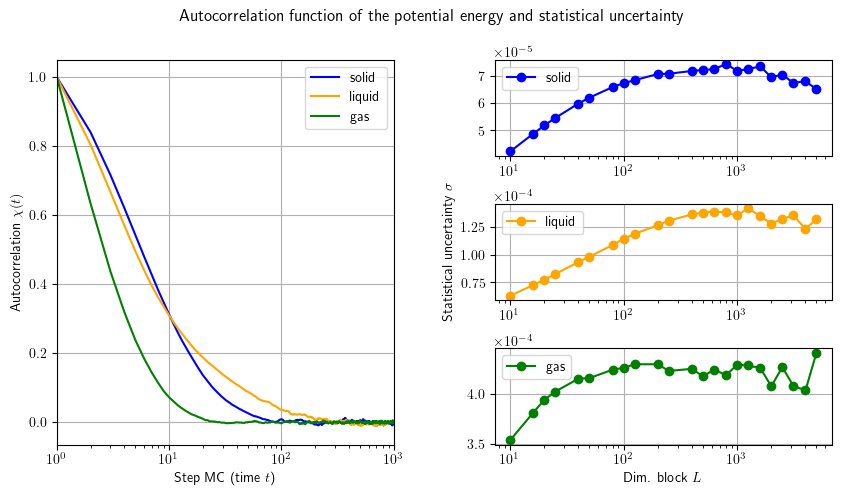

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dati autocorrelazione
data1 = np.loadtxt("autocorrelation_sol.dat", skiprows=1)
data2 = np.loadtxt("autocorrelation_liq.dat", skiprows=1)
data3 = np.loadtxt("autocorrelation_gas.dat", skiprows=1)

# Caricamento dati inncertezza statistica
data4 = np.loadtxt("error_autocorrelation_sol.dat", skiprows=1)
data5 = np.loadtxt("error_autocorrelation_liq.dat", skiprows=1)
data6 = np.loadtxt("error_autocorrelation_gas.dat", skiprows=1)

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Autocorrelation function of the potential energy and statistical uncertainty')

# Grafico di sinistra: autocorrelazione in funzione step MC
ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=3)
ax1.plot(data1[:,0], data1[:,1], c='blue', label='solid')
ax1.plot(data2[:,0], data2[:,1], c='orange', label='liquid')
ax1.plot(data3[:,0], data3[:,1], c='green', label='gas')

ax1.set_xlabel('Step MC (time $t$)')
ax1.set_ylabel('Autocorrelation $\\chi(t)$')
ax1.set_xscale('log')
ax1.set_xlim(1,1000)
ax1.legend()
ax1.grid(True)

# Grafici di destra: incertezza statistica in funzione di L
# In alto: solido
ax2 = plt.subplot2grid((3, 2), (0, 1))
ax2.plot(data4[:,0], data4[:,2], c='blue', marker='o', label='solid')
ax2.set_xscale('log')
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax2.legend()
ax2.grid(True)

# In mezzo: liquido
ax3 = plt.subplot2grid((3, 2), (1, 1))
ax3.plot(data5[:,0], data5[:,2], c='orange', marker='o', label='liquid')
ax3.set_ylabel('Statistical uncertainty $\sigma$')
ax3.set_xscale('log')
ax3.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax3.legend()
ax3.grid(True)

# In basso: gassoso
ax4 = plt.subplot2grid((3, 2), (2, 1))
ax4.plot(data6[:,0], data6[:,2], c='green', marker='o', label='gas')
ax4.set_xlabel('Dim. block $L$')
ax4.set_xscale('log')
ax4.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax4.legend()
ax4.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

Nel grafico di sinistra osserviamo che la funzione di autocorrelazione ha un decadimento simil-esponenziale, comparabile nel caso delle fasi solido-liquido e più veloce nel caso della fase gassosa. Prendendo come riferimento, per esempio, il punto in cui la curva inizia ad appiattirsi, possiamo ragionevolmente assumere che i dati siano scorrelati dopo $\sim10^3$ step MC per le fasi solido-liquido e già dopo $\sim10^2$ step MC per la fase gassosa. 

Questo è ulteriormente confermato dai grafici a destra. Infatti, l'incertezza statistica satura (più o meno) per blocchi la cui dimensione è almeno pari al tempo di scorrelazione dei dati. Il fatto che per blocchi di dimensioni inferiori l'incertezza calcolata sia inferiore è da imputare al fatto che l'errore è sottostimato. Infatti, l'incertezza statistica calcolata come deviazione standard assume che i dati siano statisticamente indipendenti fra loro. Il fatto che questi siano in realtà fra loro autocorrelati per tempi piccoli fa sì che si debba anche considerare l'errore proveniente dall'autocorrelazione, qui non incluso.

## Esercizio 7.3

In questo esercizio si chiede di implementare nel codice il calcolo della funzione di distribuzione radiale $g(r)$ per $r\in[0,L/2]$, detto $L$ il lato della scatola virtuale in cui sono contenute le particelle. Da un punto di vista pratico, la funzione $g(r)$ può essere ottenuta andando a contare ad ogni step il numero di coppie di particelle entro una distanza compresa fra $r$ e $r+dr$. Possiamo suddividere l'intervallo $[0,L/2]$ in un numero ragionevole di bin, quindi $dr$ rappresenta la larghezza di ciascun bin dell'istogramma rappresentativo della $g(r)$. La funzione di distribuzione radiale finale è ottenuta complessivamente come il risultato di una media a blocchi eseguita su ciascun bin dell'istogramma.

## Esercizio 7.4

In questo esercizio si simulano le fasi solido, liquido e gassoso utilizzando gli stessi parametri di temperatura e di densità utilizzati nell'esercitazione 4. Questa volta, tuttavia,  il sistema è simulato in ensemle canonico (NVT). In più, vengono aggiunte le correzioni di coda introdotte nel codice nell'esercizio precedente. Poiché queste ultime considerano distanze su cui il potenziale è attrattivo, le correzioni introdotte all'energia potenziale e al viriale nell'espressione della pressione sono negative.

Oltre a mostrare energia potenziale e pressione (calcolati con media a blocchi come nell'esercitazione 4), vengono anche riportate le funzioni di distribuzione radiale $g(r)$ calcolate sia per la simulazione NVE che per la simulazione NVT per le tre distinte fasi.

Facciamo queste importanti osservazioni:
1. Energia potenziale e pressione seguono lo stesso andamento. Questa è una conseguenza del fatto che la temperatura è costante, pertanto la pressione dipende unicamente dal viriale, quindi dall'energia potenziale.
2. Le funzioni di distribuzione radiale sono identiche per le due simulazioni NVE e NVT per le diverse fasi simulate. Osserviamo le seguenti caratteristiche per le tre fasi:
    - Per la fase gassosa si osserva un unico picco marcato in corrispondenza della distanza a cui il potenziale è maggiormente attrattivo.
    - Per la fase liquida si osserva un primo picco marcato come per la fase gassosa, sempre in corrispondenza della distanza a cui il potenziale è maggiormente attrattivo. Inoltre, si osserva un secondo picco meno marcato a più grande distanza. Questo non viene osservato nella fase gassosa ed è indice del fatto che nei liquidi si possono avere strutture localmente ordinate.
    - Per la fase solida si osserva una moltitudine di picchi dovuti al fatto che vi è una precisa struttura cristallina sottostante. La simulazione considera un reticolo fcc, quindi i picchi si collocano a distanze pari a $\frac{a}{\sqrt2}$ (metà della diagonale di una faccia), $a$ (ai vertici di uno spigolo), $a\sqrt2$ (diagonale di una faccia) e $a\sqrt3$ (diagonale del cubo), detto $a$ il passo reticolare.

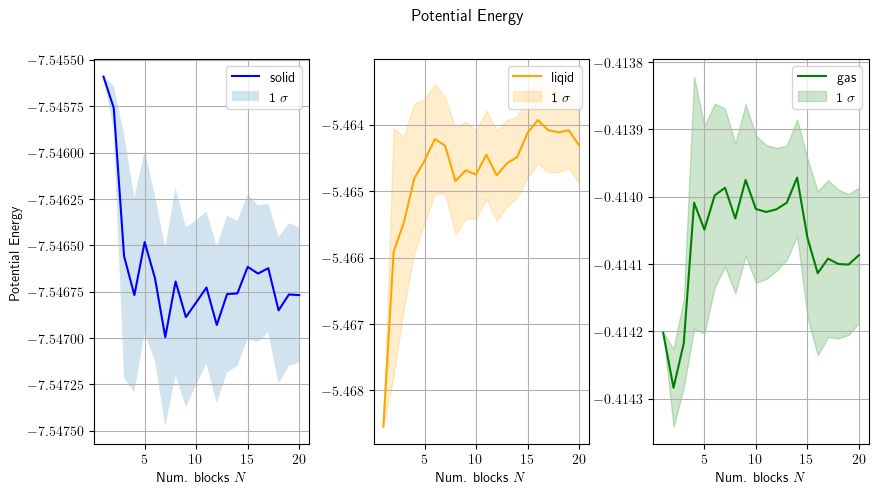

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dati delle 3 simulazioni
data1 = np.loadtxt("potential_energy_sol_NVT.dat")
data2 = np.loadtxt("potential_energy_liq_NVT.dat")
data3 = np.loadtxt("potential_energy_gas_NVT.dat")

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Potential Energy')

# Grafico fase solida
plt.subplot(1,3,1)
plt.plot(data1[:,0], data1[:,2], color='blue', label='solid')
plt.fill_between(data1[:,0], data1[:,2]-data1[:,3], data1[:,2]+data1[:,3], alpha=0.2, label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.ylabel('Potential Energy')
plt.legend()
plt.grid(True)

# Grafico fase liquida
plt.subplot(1,3,2)
plt.plot(data2[:,0], data2[:,2], color='orange', label='liqid')
plt.fill_between(data2[:,0], data2[:,2]-data2[:,3], data2[:,2]+data2[:,3], alpha=0.2, color='orange', label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.legend()
plt.grid(True)

# Grafico fase gassosa
plt.subplot(1,3,3)
plt.plot(data3[:,0], data3[:,2], color='green', label='gas')
plt.fill_between(data3[:,0], data3[:,2]-data3[:,3], data3[:,2]+data3[:,3], alpha=0.2, color='green', label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

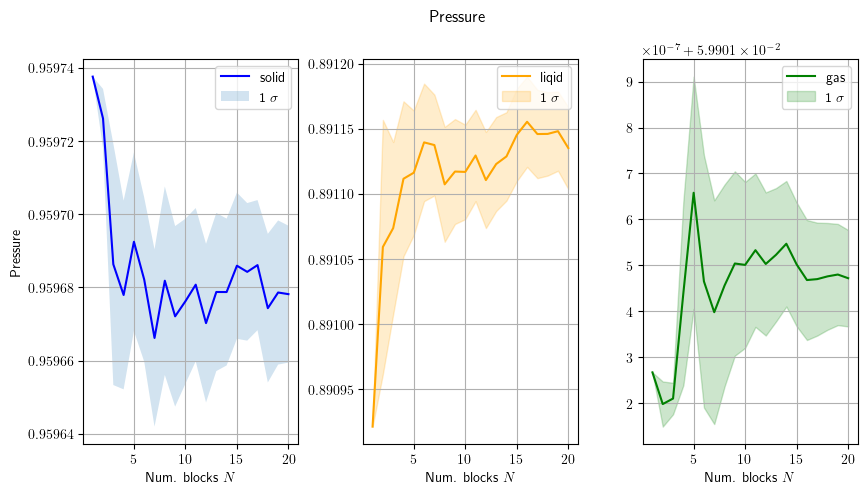

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dati delle 3 simulazioni
data1 = np.loadtxt("pressure_sol_NVT.dat")
data2 = np.loadtxt("pressure_liq_NVT.dat")
data3 = np.loadtxt("pressure_gas_NVT.dat")

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Pressure')

# Grafico fase solida
plt.subplot(1,3,1)
plt.plot(data1[:,0], data1[:,2], color='blue', label='solid')
plt.fill_between(data1[:,0], data1[:,2]-data1[:,3], data1[:,2]+data1[:,3], alpha=0.2, label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.ylabel('Pressure')
plt.legend()
plt.grid(True)

# Grafico fase liquida
plt.subplot(1,3,2)
plt.plot(data2[:,0], data2[:,2], color='orange', label='liqid')
plt.fill_between(data2[:,0], data2[:,2]-data2[:,3], data2[:,2]+data2[:,3], alpha=0.2, color='orange', label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.legend()
plt.grid(True)

# Grafico fase gassosa
plt.subplot(1,3,3)
plt.plot(data3[:,0], data3[:,2], color='green', label='gas')
plt.fill_between(data3[:,0], data3[:,2]-data3[:,3], data3[:,2]+data3[:,3], alpha=0.2, color='green', label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

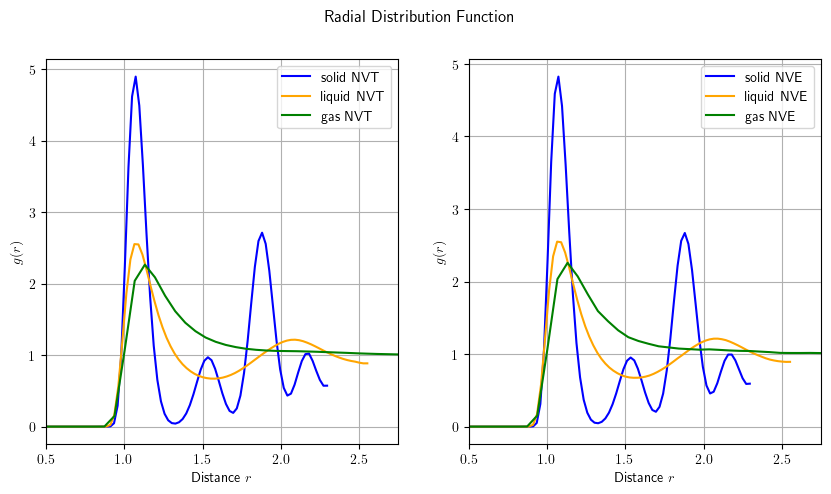

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dati delle 6 simulazioni (3 NVT e 3 NVE)
data1 = np.loadtxt("gofr_sol_NVT.dat", skiprows=1)
data2 = np.loadtxt("gofr_liq_NVT.dat", skiprows=1)
data3 = np.loadtxt("gofr_gas_NVT.dat", skiprows=1)
data4 = np.loadtxt("gofr_sol_NVE.dat", skiprows=1)
data5 = np.loadtxt("gofr_liq_NVE.dat", skiprows=1)
data6 = np.loadtxt("gofr_gas_NVE.dat", skiprows=1)

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Radial Distribution Function')

# Grafico di sinistra: simulazione NVT
plt.subplot(1,2,1)
plt.plot(data1[:,0], data1[:,1], color='blue', label='solid NVT')
plt.plot(data2[:,0], data2[:,1], color='orange', label='liquid NVT')
plt.plot(data3[:,0], data3[:,1], color='green', label='gas NVT')

plt.xlabel('Distance $r$')
plt.ylabel('$g(r)$')
plt.legend()
plt.xlim(0.5,2.75)
plt.grid(True)

# Grafico di destra: simulazione NVE
plt.subplot(1,2,2)
plt.plot(data4[:,0], data4[:,1], color='blue', label='solid NVE')
plt.plot(data5[:,0], data5[:,1], color='orange', label='liquid NVE')
plt.plot(data6[:,0], data6[:,1], color='green', label='gas NVE')

plt.xlabel('Distance $r$')
plt.ylabel('$g(r)$')
plt.legend()
plt.xlim(0.5,2.75)
plt.grid(True)

plt.show()